<a href="https://colab.research.google.com/github/TanPMT/FlagDect/blob/tan/Tan_FlagDetected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd "/gdrive/MyDrive/TrainModel/Dataset/"

/gdrive/MyDrive/TrainModel/Dataset


In [ ]:
!unzip file.zip


In [ ]:
# Đổi tên các tập tin bắt đầu với "5_g" thành "Angola_1.jpg", "Angola_2.jpg", v.v.
!for file in 193_g*; do mv "$file" "Yemen.$((++count)).jpg"; done


In [6]:
import os

# Điều hướng đến thư mục chứa các tập tin
os.chdir("/gdrive/MyDrive/TrainModel/Dataset/train")

# Lặp qua tất cả các tập tin trong thư mục
for filename in os.listdir():
    # Kiểm tra xem tên tập tin có đúng định dạng không
    if filename.startswith(tuple(str(x) for x in range(10))) and '_' in filename and 'g' in filename:
        # Xóa tập tin
        os.remove(filename)


In [8]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import cv2
import os
import pandas as pd
from PIL import Image

data_path = "/gdrive/MyDrive/TrainModel/Dataset/train"

#Hàm để trích xuất đặc trưng histogram màu từ hình ảnh
def compute_color_histogram(image_path):
    img = cv2.imread(image_path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_img], [0, 1, 2], None, [180, 256, 256], [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):
    # Đọc hình ảnh từ đường dẫn


    # Chuyển đổi thành hình ảnh xám để tìm đường viền (contours)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tìm tất cả đường viền trong hình ảnh
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Tìm bounding box của contour lớn nhất (lá cờ)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)

    # Cắt hình ảnh dựa trên bounding box
    flag = image[y:y+h, x:x+w]

    # Điều chỉnh kích thước ảnh về cùng kích cỡ, giả sử 128x128
    flag_resized = cv2.resize(flag, (256, 256))

    # Chuyển đổi hình ảnh đã chỉnh kích thước sang không gian màu HSV
    hsv = cv2.cvtColor(flag_resized, cv2.COLOR_BGR2HSV)

    # Tính toán histogram màu
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)

    return hist.flatten()

def computeHistogram(pathfilename):
  img = cv2.imread(pathfilename,0)
  hist = cv2.calcHist([img],[0],None,[256],[0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist / size
  return hist.flatten()

def load_and_extract_features(data_path):
    features = []
    labels = []
    for idx, filename in enumerate(os.listdir(data_path)):

    # Kiểm tra xem tệp có phải là ảnh không
      if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Đường dẫn đầy đủ đến tệp ảnh
        image_path = os.path.join(data_path, filename)
        label = filename.split(".")[0]
        # Đọc ảnh từ đường dẫn
        image = cv2.imread(image_path)


        # Thêm nhãn vào danh sách nhãn
        #labels.append(label)

        # Tính đặc trưng của ảnh và thêm vào danh sách đặc trưng
        hist = extract_color_histogram(image)
        #hist = computeHistogram(image_path)

        labels.append(label)
        features.append(hist)

    # Chuyển danh sách features và labels thành mảng numpy
    return np.array(features), np.array(labels)


In [14]:
image_path = "/gdrive/MyDrive/TrainModel/Dataset/train/"
image = cv2.imread(image_path)
print(image)

None


In [9]:
train_data_path = "/gdrive/MyDrive/TrainModel/Dataset/train"


In [11]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
train_features, train_labels = load_and_extract_features(train_data_path)

#model = LogisticRegression(max_iter=1000)
#model = KNeighborsClassifier(n_neighbors=6)


# Khởi tạo mô hình XGBoost
# model = xgb.XGBClassifier()
model = SVC(kernel='linear', C=1.0)
# Khởi tạo mô hình LightGBM
#model = lgb.LGBMClassifier(max_depth=5)
# Compile mô hình
model.fit(train_features, train_labels)

Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Israel
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Jordan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kazakhstan
Kuwait
Kuwait
Kuwait
Kuwait
Kuwait
Kuwait
Kuwait
Kuwait
Kuwait

SVC(kernel='linear')

In [12]:
trainAcc = model.score(train_features, train_labels)
print("Accuracy of train: ", trainAcc)

Accuracy of train:  0.4198524480214621


In [22]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg
photo.jpg


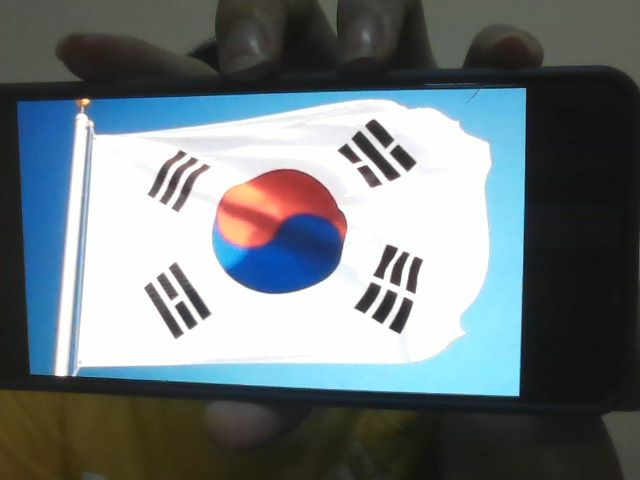

In [29]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  print(filename)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import
mage_path = "photo.jpg"


image = cv2.imread(image_path)
print(type(image))
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
# hist =  load_and_extract_features(image)

# # Reshape đặc trưng để phù hợp với mô hình
# hist = hist.reshape(1,-1)

# # Dự đoán nhãn của ảnh
# predicted_label = model.predict(hist)

# # In kết quả dự đoán
# print("Predicted label:", predicted_label)

<class 'NoneType'>


NameError: name 'cv2_imshow' is not defined

Predicted label: ['Cyprus']


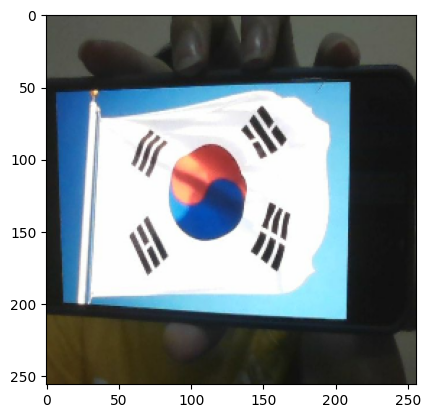

In [33]:
import matplotlib.pyplot as plt
image_path = "/gdrive/MyDrive/TrainModel/Dataset/train/photo.jpg"
image = plt.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tìm tất cả đường viền trong hình ảnh
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Tìm bounding box của contour lớn nhất (lá cờ)
max_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(max_contour)

    # Cắt hình ảnh dựa trên bounding box
flag = image[y:y+h, x:x+w]

    # Điều chỉnh kích thước ảnh về cùng kích cỡ, giả sử 128x128
image = cv2.resize(flag, (256, 256))
plt.imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = model.predict(hist)

# In kết quả dự đoán
print("Predicted label:", predicted_label)

In [ ]:
import cv2

def connect_and_display(camera_index=0):
    """
    Kết nối với camera và hiển thị hình ảnh từ camera lên màn hình.

    Parameters:
    camera_index (int): Chỉ số của camera. Mặc định là 0.
    """
    # Kết nối với camera
    cap = cv2.VideoCapture(camera_index)

    # Kiểm tra xem camera có được kết nối hay không
    if not cap.isOpened():
        print("Không thể kết nối với camera.")
        return

    print("Đã kết nối với camera. Nhấn 'q' để thoát.")

    while True:
        # Đọc khung hình từ camera
        ret, frame = cap.read()

        # Kiểm tra xem có lỗi khi đọc khung hình không
        if not ret:
            print("Không thể đọc được khung hình từ camera.")
            break

        # Hiển thị khung hình lên màn hình
        cv2.imshow('Camera', frame)

        # Nhấn 'q' để thoát
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Giải phóng tài nguyên
    cap.release()
    cv2.destroyAllWindows()

# Sử dụng hàm connect_and_display để kết nối với camera và hiển thị hình ảnh
connect_and_display()


Không thể kết nối với camera.


In [ ]:
from PIL import Image
image_path = "/gdrive/MyDrive/TrainModel/Dataset/train/Vietnam.7.jpg"
# Đọc ảnh từ file
image = Image.open(image_path)
#image = cv2.imread(image_path)
# Cắt ảnh
#cropped_img = image.crop((60, 116, 254, 218))
#image = image.crop((60, 116, 254, 218))
hist = extract_color_histogram(image)
print(hist)

In [ ]:
image_path = "/gdrive/MyDrive/TrainModel/Dataset/train/Jordan.5.jpg"

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

# Đọc ảnh từ file
image = cv2.imread(image_path)
cropped_img = image.crop((47, 103, 271, 215))
# Hiển thị ảnh
cv2_imshow(image)


AttributeError: 'numpy.ndarray' object has no attribute 'crop'

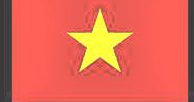

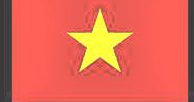

In [ ]:
from PIL import Image
image_path = "/gdrive/MyDrive/TrainModel/Dataset/train/Vietnam.7.jpg"
# Đọc ảnh từ file
image = Image.open(image_path)
# Cắt ảnh
#cropped_img = image.crop((60, 116, 254, 218))
image = image.crop((60, 116, 254, 218))
# Hiển thị ảnh gốc
display(image)
# Hiển thị ảnh đã cắt
display(cropped_img)


In [ ]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2
import os
import pandas as pd

data_path = "/gdrive/MyDrive/TrainModel/Dataset/train"

# Hàm để trích xuất đặc trưng histogram màu từ hình ảnh
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

features = []
labels = []
for idx, filename in enumerate(os.listdir(data_path)):

      csv_file_path = os.path.join(data_path, "_annotations.csv")
         # Đọc dữ liệu từ file CSV vào một DataFrame
      df = pd.read_csv(csv_file_path)
      image_path = os.path.join(data_path, filename)

        # Đọc ảnh từ đường dẫn
      image = cv2.imread(image_path)
      #print(image_path)
      #print ("-----")
        # Duyệt qua từng dòng trong DataFrame
      for index, row in df.iterrows():
        # Lấy giá trị của cột thứ nhất và thứ tư của dòng hiện tại
          column1_value = row.iloc[0]  # Cột thứ nhất
          column4_value = row.iloc[3]  # Cột thứ tư (do Python bắt đầu từ 0)
          #print(column4_value)
          if column1_value == filename :
           hist = extract_color_histogram(image)
           features.append(hist)
           labels.append(column4_value)


KeyboardInterrupt: 

In [7]:
print(labels)

NameError: name 'labels' is not defined

In [ ]:


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2
import os
import pandas as pd

# Hàm để trích xuất đặc trưng histogram màu từ hình ảnh
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()


# Hàm để load và trích xuất đặc trưng từ tập dữ liệu
def load_and_extract_features(data_path):
    features = []
    labels = []
    for idx, filename in enumerate(os.listdir(data_path)):
      if idx >= 500:
        break
    # Kiểm tra xem tệp có phải là ảnh không
      if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Đường dẫn đầy đủ đến tệp ảnh
        image_path = os.path.join(data_path, filename)

        # Đọc ảnh từ đường dẫn
        image = cv2.imread(image_path)
        csv_file_path = os.path.join(data_path, "_annotations.csv")
         # Đọc dữ liệu từ file CSV vào một DataFrame
        df = pd.read_csv(csv_file_path)

        # Duyệt qua từng dòng trong DataFrame
        for index, row in df.iterrows():
        # Lấy giá trị của cột thứ nhất và thứ tư của dòng hiện tại
          column1_value = row.iloc[0]  # Cột thứ nhất
          column4_value = row.iloc[3]  # Cột thứ tư (do Python bắt đầu từ 0)
          if column1_value == filename :
            hist = extract_color_histogram(image)
            features.append(hist)
            labels.append(column4_value)

      return np.array(features), np.array(labels)

# Đường dẫn tới thư mục chứa các hình ảnh của các loại cờ quốc gia
train_data_path = "/gdrive/MyDrive/TrainModel/Dataset/train"
test_data_path = "/gdrive/MyDrive/TrainModel/Dataset/test"
valid_data_path = "/gdrive/MyDrive/TrainModel/Dataset/valid"
# Load và trích xuất đặc trưng từ tập dữ liệu huấn luyện
train_features, train_labels = load_and_extract_features(train_data_path)

# Load và trích xuất đặc trưng từ tập dữ liệu kiểm tra
test_features, test_labels = load_and_extract_features(test_data_path)

# Load và trích xuất đặc trưng từ tập dữ liệu validation
valid_features, valid_labels = load_and_extract_features(valid_data_path)

# Xây dựng mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)

# Compile mô hình
model.fit(train_features, train_labels)


# Đánh giá mô hình trên tập kiểm tra
test_predictions = model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

# Đánh giá mô hình trên tập validation
valid_predictions = model.predict(valid_features)
valid_accuracy = accuracy_score(valid_labels, valid_predictions)
print("Validation accuracy:", valid_accuracy)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Laos'

In [ ]:


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2
import os
import pandas as pd

# Hàm để trích xuất đặc trưng histogram màu từ hình ảnh
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()


# Hàm để load và trích xuất đặc trưng từ tập dữ liệu
def load_and_extract_features(data_path):
    features = []
    labels = []
    for filename in os.listdir(data_path):
    # Kiểm tra xem tệp có phải là ảnh không
      if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Đường dẫn đầy đủ đến tệp ảnh
        image_path = os.path.join(data_path, filename)

        # Đọc ảnh từ đường dẫn
        image = cv2.imread(image_path)
        csv_file_path = os.path.join(data_path, "_annotations.csv")
         # Đọc dữ liệu từ file CSV vào một DataFrame
        df = pd.read_csv(csv_file_path)

        # Duyệt qua từng dòng trong DataFrame
        for index, row in df.iterrows():
        # Lấy giá trị của cột thứ nhất và thứ tư của dòng hiện tại
          column1_value = row.iloc[0]  # Cột thứ nhất
          column4_value = row.iloc[3]  # Cột thứ tư (do Python bắt đầu từ 0)
          if column1_value == filename :
            hist = extract_color_histogram(image)
            features.append(hist)
            labels.append(column4_value)

    return np.array(features), np.array(labels)

# Đường dẫn tới thư mục chứa các hình ảnh của các loại cờ quốc gia
train_data_path = "/gdrive/MyDrive/TrainModel/Dataset/train"
test_data_path = "/gdrive/MyDrive/TrainModel/Dataset/test"
valid_data_path = "/gdrive/MyDrive/TrainModel/Dataset/valid"
# Load và trích xuất đặc trưng từ tập dữ liệu huấn luyện
train_features, train_labels = load_and_extract_features(train_data_path)

# Load và trích xuất đặc trưng từ tập dữ liệu kiểm tra
test_features, test_labels = load_and_extract_features(test_data_path)

# Load và trích xuất đặc trưng từ tập dữ liệu validation
valid_features, valid_labels = load_and_extract_features(valid_data_path)

# Xây dựng mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)

# Compile mô hình
model.fit(train_features, train_labels)
model.fit()

# Đánh giá mô hình trên tập kiểm tra
test_predictions = model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

# Đánh giá mô hình trên tập validation
valid_predictions = model.predict(valid_features)
valid_accuracy = accuracy_score(valid_labels, valid_predictions)
print("Validation accuracy:", valid_accuracy)


KeyboardInterrupt: 

In [ ]:
ls


sample_data/


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2
import os

# Đường dẫn tới thư mục chứa các hình ảnh của các loại cờ quốc gia
train_data_path = "/gdrive/MyDrive/TrainModel/train"
test_data_path = "/gdrive/MyDrive/TrainModel/test"
valid_data_path = "/gdrive/MyDrive/TrainModel/valid"

data_path = "/gdrive/MyDrive/TrainModel/Dataset"
# Hàm để trích xuất đặc trưng histogram màu từ hình ảnh
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Hàm để load và trích xuất đặc trưng từ tập dữ liệu
def load_and_extract_features(data_path):
    features = []
    labels = []
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        for file_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file_name)
            image = cv2.imread(image_path)
            hist = extract_color_histogram(image)
            features.append(hist)
            labels.append(folder_name)
    return np.array(features), np.array(labels)

# Load và trích xuất đặc trưng từ tập dữ liệu huấn luyện
train_features, train_labels = load_and_extract_features(train_data_path)

# Load và trích xuất đặc trưng từ tập dữ liệu kiểm tra
test_features, test_labels = load_and_extract_features(test_data_path)

# Load và trích xuất đặc trưng từ tập dữ liệu validation
valid_features, valid_labels = load_and_extract_features(valid_data_path)

# Xây dựng mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)

# Compile mô hình
model.fit(train_features, train_labels)

# Huấn luyện mô hình
test_predictions = model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

valid_predictions = model.predict(valid_features)
valid_accuracy = accuracy_score(valid_labels, valid_predictions)
print("Validation accuracy:", valid_accuracy)


FileNotFoundError: [Errno 2] No such file or directory: '/gdrive/MyDrive/TrainModel/train'